# MSBA 327 _ Customer Support on Twitter Using Text Analysis Methodology

In [2]:
# Customer Support on Twitter 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math    
import operator
#

In [3]:
df = pd.read_csv('~/Downloads/MSBA 327 Final Dat.csv')
df.head()

tweet_id     author_id  inbound                      created_at  \
0    119237        105834     True  Wed Oct 11 06:55:44 +0000 2017   
1    119238  ChaseSupport    False  Wed Oct 11 13:25:49 +0000 2017   
2    119239        105835     True  Wed Oct 11 13:00:09 +0000 2017   
3    119240  VirginTrains    False  Tue Oct 10 15:16:08 +0000 2017   
4    119241        105836     True  Tue Oct 10 15:17:21 +0000 2017   

                                                text response_tweet_id  \
0  @AppleSupport causing the reply to be disregar...            119236   
1  @105835 Your business means a lot to us. Pleas...               NaN   
2  @76328 I really hope you all change but I'm su...            119238   
3  @105836 LiveChat is online at the moment - htt...            119241   
4  @VirginTrains see attached error message. I've...            119243   

   in_response_to_tweet_id  
0                      NaN  
1                 119239.0  
2                      NaN  
3                 119242.0  
4                 119240.0

In [39]:
# df_inbound = df["inbound"]
df.loc[df['inbound'] == True, 'inbound'] = 1
df.loc[df['inbound'] == False, 'inbound'] = 0

In [5]:
print(df["inbound"])

0     1
1     0
2     1
3     0
4     1
     ..
88    1
89    1
90    0
91    1
92    0
Name: inbound, Length: 93, dtype: object


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 93 non-null     int64  
 1   author_id                93 non-null     object 
 2   inbound                  93 non-null     object 
 3   created_at               93 non-null     object 
 4   text                     93 non-null     object 
 5   response_tweet_id        65 non-null     object 
 6   in_response_to_tweet_id  68 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 5.2+ KB


In [8]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

/var/folders/86/lntksb550lqghk9n494rb9rw0000gn/T/ipykernel_1067/788556888.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
/var/folders/86/lntksb550lqghk9n494rb9rw0000gn/T/ipykernel_1067/788556888.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


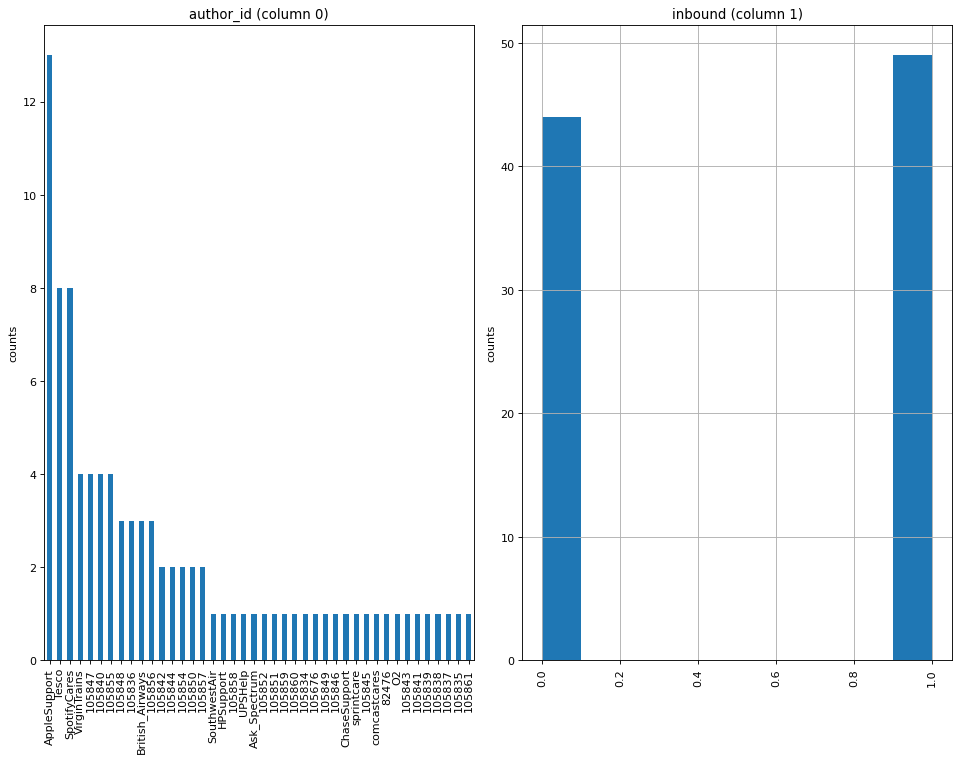

In [9]:
plotPerColumnDistribution(df, 10, 5)

In [10]:
df1 = df.drop(df.columns[[0, 1, 3, 5, 6]], axis=1)
df1.head()

inbound                                               text
0       1  @AppleSupport causing the reply to be disregar...
1       0  @105835 Your business means a lot to us. Pleas...
2       1  @76328 I really hope you all change but I'm su...
3       0  @105836 LiveChat is online at the moment - htt...
4       1  @VirginTrains see attached error message. I've...

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   inbound  93 non-null     object
 1   text     93 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB


In [12]:
#Remove punctuation
import string
punctuations = string.punctuation
print(punctuations)

%timeit
def remove_punctuations(text):
    return text.translate(str.maketrans('','',punctuations))
    

df1['text_wo_punct'] = df1['text'].apply(lambda text: remove_punctuations(text))
df1.head(10)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


inbound                                               text  \
0       1  @AppleSupport causing the reply to be disregar...   
1       0  @105835 Your business means a lot to us. Pleas...   
2       1  @76328 I really hope you all change but I'm su...   
3       0  @105836 LiveChat is online at the moment - htt...   
4       1  @VirginTrains see attached error message. I've...   
5       0  @105836 Have you tried from another device, Mi...   
6       1  @VirginTrains yep, I've tried laptop too sever...   
7       0  @105836 It's working OK from here, Miriam. Doe...   
8       1  @VirginTrains I still haven't heard &amp; the ...   
9       0  @105836 That's what we're here for Miriam 😊  T...   

                                       text_wo_punct  
0  AppleSupport causing the reply to be disregard...  
1  105835 Your business means a lot to us Please ...  
2  76328 I really hope you all change but Im sure...  
3  105836 LiveChat is online at the moment  https...  
4  VirginTrains see attached error message Ive tr...  
5  105836 Have you tried from another device Miri...  
6  VirginTrains yep Ive tried laptop too several ...  
7  105836 Its working OK from here Miriam Does th...  
8  VirginTrains I still havent heard amp the numb...  
9  105836 Thats what were here for Miriam 😊  The ...

In [13]:
# Remove Stop Words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
', '.join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [15]:
stopwords_set = set(stopwords.words('english'))
def remove_stopwords(text):
    return ' '.join(words for words in str(text).split() if words not in stopwords_set)
    

df1['text_wo_stop'] = df1['text_wo_punct'].apply(lambda text: remove_stopwords(text))
df1.head()

inbound                                               text  \
0       1  @AppleSupport causing the reply to be disregar...   
1       0  @105835 Your business means a lot to us. Pleas...   
2       1  @76328 I really hope you all change but I'm su...   
3       0  @105836 LiveChat is online at the moment - htt...   
4       1  @VirginTrains see attached error message. I've...   

                                       text_wo_punct  \
0  AppleSupport causing the reply to be disregard...   
1  105835 Your business means a lot to us Please ...   
2  76328 I really hope you all change but Im sure...   
3  105836 LiveChat is online at the moment  https...   
4  VirginTrains see attached error message Ive tr...   

                                        text_wo_stop  
0  AppleSupport causing reply disregarded tapped ...  
1  105835 Your business means lot us Please DM na...  
2  76328 I really hope change Im sure wont Becaus...  
3  105836 LiveChat online moment httpstcoSY94VtU8...  
4  VirginTrains see attached error message Ive tr...

In [16]:
#Remove steeming
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')

def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in str(text).split()])

df1['text_stemmed'] = df1['text_wo_stop'].apply(lambda text: stem_words(text))
df1.head(10)

inbound                                               text  \
0       1  @AppleSupport causing the reply to be disregar...   
1       0  @105835 Your business means a lot to us. Pleas...   
2       1  @76328 I really hope you all change but I'm su...   
3       0  @105836 LiveChat is online at the moment - htt...   
4       1  @VirginTrains see attached error message. I've...   
5       0  @105836 Have you tried from another device, Mi...   
6       1  @VirginTrains yep, I've tried laptop too sever...   
7       0  @105836 It's working OK from here, Miriam. Doe...   
8       1  @VirginTrains I still haven't heard &amp; the ...   
9       0  @105836 That's what we're here for Miriam 😊  T...   

                                       text_wo_punct  \
0  AppleSupport causing the reply to be disregard...   
1  105835 Your business means a lot to us Please ...   
2  76328 I really hope you all change but Im sure...   
3  105836 LiveChat is online at the moment  https...   
4  VirginTrains see attached error message Ive tr...   
5  105836 Have you tried from another device Miri...   
6  VirginTrains yep Ive tried laptop too several ...   
7  105836 Its working OK from here Miriam Does th...   
8  VirginTrains I still havent heard amp the numb...   
9  105836 Thats what were here for Miriam 😊  The ...   

                                        text_wo_stop  \
0  AppleSupport causing reply disregarded tapped ...   
1  105835 Your business means lot us Please DM na...   
2  76328 I really hope change Im sure wont Becaus...   
3  105836 LiveChat online moment httpstcoSY94VtU8...   
4  VirginTrains see attached error message Ive tr...   
5         105836 Have tried another device Miriam MM   
6  VirginTrains yep Ive tried laptop several time...   
7  105836 Its working OK Miriam Does link help ht...   
8  VirginTrains I still havent heard amp number I...   
9  105836 Thats Miriam 😊 The team send email shor...   

                                        text_stemmed  
0  applesupport caus repli disregard tap notif ke...  
1  105835 your busi mean lot us pleas dm name zip...  
2  76328 i realli hope chang im sure wont becaus ...  
3  105836 livechat onlin moment httpstcosy94vtu8k...  
4  virgintrain see attach error messag ive tri le...  
5              105836 have tri anoth devic miriam mm  
6  virgintrain yep ive tri laptop sever time past...  
7  105836 it work ok miriam doe link help httpstc...  
8  virgintrain i still havent heard amp number im...  
9  105836 that miriam 😊 the team send email short hp

In [17]:
# Remove emojis
import re
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
remove_emoji('game is on 🔥🔥')

df1['text_emoji'] = df1['text_stemmed'].apply(lambda string: remove_emoji(string))
df1.head(10)

inbound                                               text  \
0       1  @AppleSupport causing the reply to be disregar...   
1       0  @105835 Your business means a lot to us. Pleas...   
2       1  @76328 I really hope you all change but I'm su...   
3       0  @105836 LiveChat is online at the moment - htt...   
4       1  @VirginTrains see attached error message. I've...   
5       0  @105836 Have you tried from another device, Mi...   
6       1  @VirginTrains yep, I've tried laptop too sever...   
7       0  @105836 It's working OK from here, Miriam. Doe...   
8       1  @VirginTrains I still haven't heard &amp; the ...   
9       0  @105836 That's what we're here for Miriam 😊  T...   

                                       text_wo_punct  \
0  AppleSupport causing the reply to be disregard...   
1  105835 Your business means a lot to us Please ...   
2  76328 I really hope you all change but Im sure...   
3  105836 LiveChat is online at the moment  https...   
4  VirginTrains see attached error message Ive tr...   
5  105836 Have you tried from another device Miri...   
6  VirginTrains yep Ive tried laptop too several ...   
7  105836 Its working OK from here Miriam Does th...   
8  VirginTrains I still havent heard amp the numb...   
9  105836 Thats what were here for Miriam 😊  The ...   

                                        text_wo_stop  \
0  AppleSupport causing reply disregarded tapped ...   
1  105835 Your business means lot us Please DM na...   
2  76328 I really hope change Im sure wont Becaus...   
3  105836 LiveChat online moment httpstcoSY94VtU8...   
4  VirginTrains see attached error message Ive tr...   
5         105836 Have tried another device Miriam MM   
6  VirginTrains yep Ive tried laptop several time...   
7  105836 Its working OK Miriam Does link help ht...   
8  VirginTrains I still havent heard amp number I...   
9  105836 Thats Miriam 😊 The team send email shor...   

                                        text_stemmed  \
0  applesupport caus repli disregard tap notif ke...   
1  105835 your busi mean lot us pleas dm name zip...   
2  76328 i realli hope chang im sure wont becaus ...   
3  105836 livechat onlin moment httpstcosy94vtu8k...   
4  virgintrain see attach error messag ive tri le...   
5              105836 have tri anoth devic miriam mm   
6  virgintrain yep ive tri laptop sever time past...   
7  105836 it work ok miriam doe link help httpstc...   
8  virgintrain i still havent heard amp number im...   
9  105836 that miriam 😊 the team send email short hp   

                                          text_emoji  
0  applesupport caus repli disregard tap notif ke...  
1  105835 your busi mean lot us pleas dm name zip...  
2  76328 i realli hope chang im sure wont becaus ...  
3  105836 livechat onlin moment httpstcosy94vtu8k...  
4  virgintrain see attach error messag ive tri le...  
5              105836 have tri anoth devic miriam mm  
6  virgintrain yep ive tri laptop sever time past...  
7  105836 it work ok miriam doe link help httpstc...  
8  virgintrain i still havent heard amp number im...  
9   105836 that miriam  the team send email short hp

In [18]:
df1.describe().T

count unique                                                top  \
inbound          93      2                                                  1   
text             93     93  @AppleSupport causing the reply to be disregar...   
text_wo_punct    93     93  AppleSupport causing the reply to be disregard...   
text_wo_stop     93     93  AppleSupport causing reply disregarded tapped ...   
text_stemmed     93     93  applesupport caus repli disregard tap notif ke...   
text_emoji       93     93  applesupport caus repli disregard tap notif ke...   

              freq  
inbound         49  
text             1  
text_wo_punct    1  
text_wo_stop     1  
text_stemmed     1  
text_emoji       1

Text(0.5, 1.0, 'Text Range per Tweet')

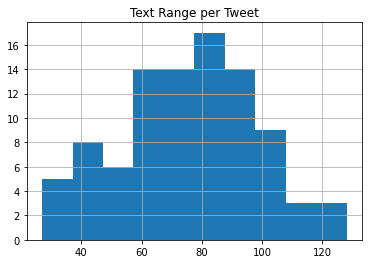

In [19]:
#Review Range 
df1['text_emoji'].str.len().hist()
plt.title("Text Range per Tweet")

In [20]:
import plotly.express as px

import sys
print(sys.executable)

/Users/mac/opt/anaconda3/bin/python


In [21]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [22]:
from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
stop_words = stopwords.words()

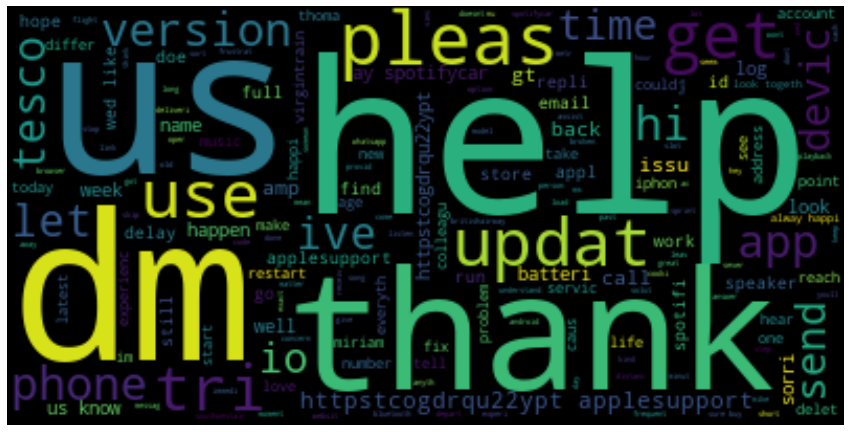

In [24]:
# Create stopword list:
stopwords = set(stopwords.words("english"))
textt = " ".join(review for review in df1.text_emoji)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('Wordcloud for Positive Review')
plt.show()

Text(0.5, 1.0, 'Reviews Not Delivered to Company')

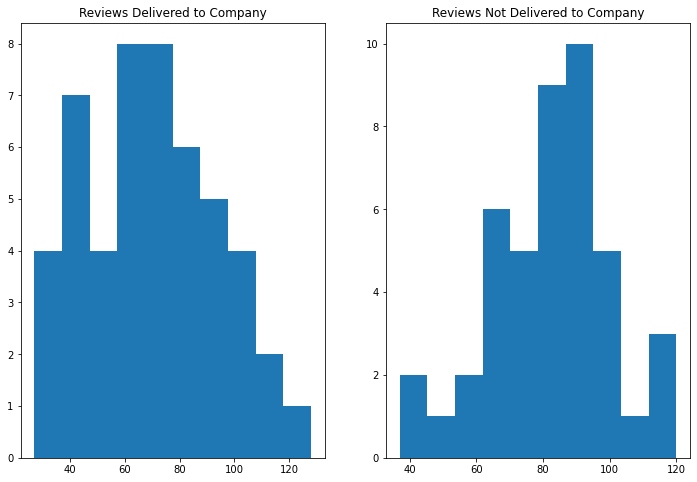

In [25]:
#Positive and Negative of text
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
ax1.hist(df1[df1['inbound']==1]['text_emoji'].str.len())
ax1.set_title( 'Reviews Delivered to Company')

ax2.hist(df1[df1['inbound']==0]['text_emoji'].str.len())
ax2.set_title( 'Reviews Not Delivered to Company')

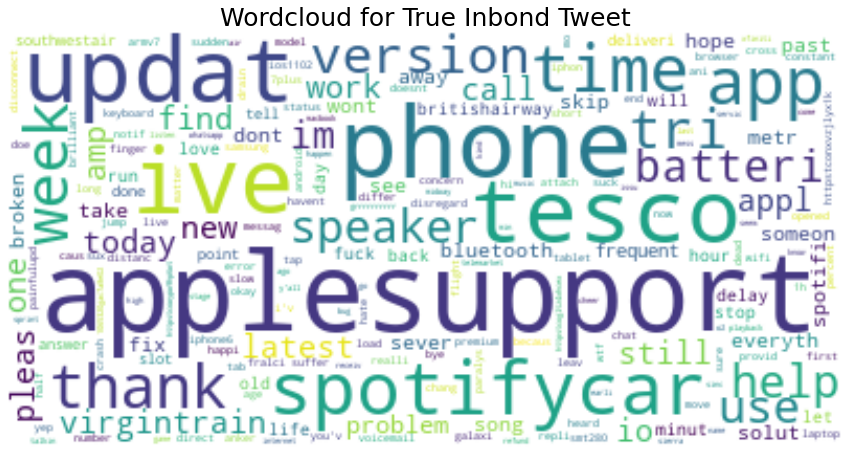

In [26]:
# True inbond of the tweet
text = " ".join(i for i in df1[df1['inbound']== 1]['text_emoji'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for True Inbond Tweet', fontsize = 25)
plt.show()

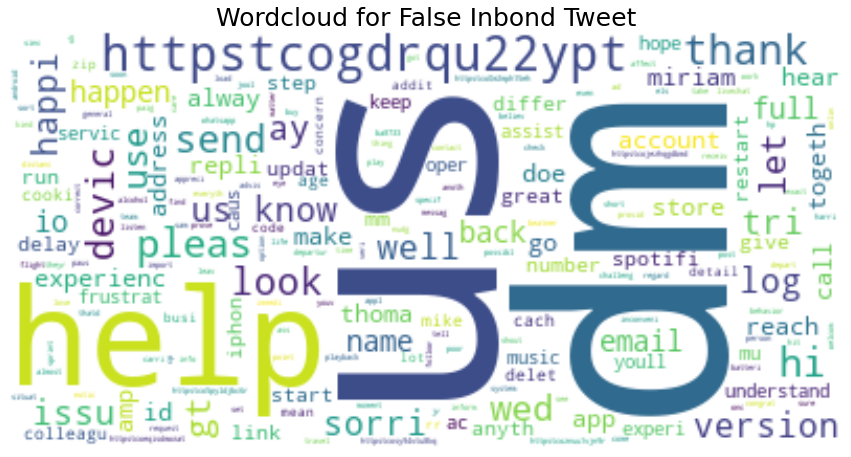

In [27]:
# False inbond of the tweet
text = " ".join(i for i in df1[df1['inbound']== 0]['text_emoji'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for False Inbond Tweet', fontsize = 25)
plt.show()

In [28]:
#Working with the most Frequent Words: 
from collections import Counter
cnt = Counter()
for text in df1["text_emoji"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0                   i     34
1                  us     25
2                help     21
3                  dm     19
4               thank     14
5  httpstcogdrqu22ypt     12
6        applesupport     11
7               pleas     11
8               updat     10
9                 use     10

In [29]:
#Common Words in Text
px.bar(temp, x="count", y="word", title='Commmon Words in Text', orientation='h', 
             width=700, height=700)

In [42]:
#Tokenization
nb = df1.drop(columns=['text','text_wo_punct', 'text_wo_stop', 'text_stemmed'])
nb.columns=['inbound','text_emoji']
nb

inbound                                         text_emoji
0        1  applesupport caus repli disregard tap notif ke...
1        0  105835 your busi mean lot us pleas dm name zip...
2        1  76328 i realli hope chang im sure wont becaus ...
3        0  105836 livechat onlin moment httpstcosy94vtu8k...
4        1  virgintrain see attach error messag ive tri le...
..     ...                                                ...
88       1  105860 i wish amazon option i get ship up stor...
89       1    they reschedul shit tomorrow httpstcorsvzct982t
90       0  105861 hey sara sorri hear issu i ask lay spee...
91       1  tesco bit find layout cumbersom remov item fav...
92       0  105861 if doesnt help pleas dm full name addre...

[93 rows x 2 columns]

In [43]:
tokenized_review=nb['text_emoji'].apply(lambda x: x.split())
tokenized_review.head(5)

0    [applesupport, caus, repli, disregard, tap, no...
1    [105835, your, busi, mean, lot, us, pleas, dm,...
2    [76328, i, realli, hope, chang, im, sure, wont...
3    [105836, livechat, onlin, moment, httpstcosy94...
4    [virgintrain, see, attach, error, messag, ive,...
Name: text_emoji, dtype: object

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
# cv = CountVectorizer()
text_counts = cv.fit_transform(nb['text_emoji'])

In [95]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X = text_counts
y = nb['inbound']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

y_train=y_train.astype('int16')
y_test = y_test.astype('int16')

In [96]:
#Navies Bayes Modeling

In [102]:
#Mutilnominal NB model:

from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()

    
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)

accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 89.47%
------------------------------------------------
Confusion Matrix:
   0  1
0  8  0
1  2  9
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.82      0.90        11

    accuracy                           0.89        19
   macro avg       0.90      0.91      0.89        19
weighted avg       0.92      0.89      0.90        19



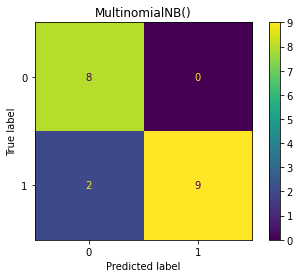

In [104]:
#COnfusion Matrics
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
k= [MNB]
for i in k: 
    plot_confusion_matrix(i, X_test, y_test)  
    plt.title(i)
    plt.show()

0.9659090909090909


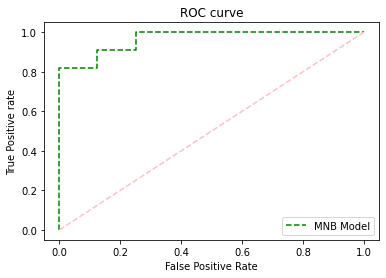

In [106]:
from sklearn.metrics import roc_curve

# predict probabilities for CNB, MNB, BNB models: 
MNB_prob = MNB.predict_proba(X_test)

# roc curve for models
fpr2, tpr2, thresh2 = roc_curve(y_test, MNB_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# auc scores
from sklearn.metrics import roc_auc_score
auc_MNB = roc_auc_score(y_test, MNB_prob[:,1])
print(auc_MNB)

# plot roc curves
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='MNB Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='pink')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();